In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")

# Load dataset
df2 = pd.read_csv('../airflow/data/vehicles.csv')

# Basic preview
df2.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [225]:
df = df2.copy()

In [226]:

# Dataset info and summary
print(df.info())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [227]:

# Check for missing values
df.isnull().sum().sort_values(ascending=False)


county          426880
size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
lat               6549
long              6549
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
description         70
posting_date        68
image_url           68
region_url           0
url                  0
id                   0
region               0
price                0
state                0
dtype: int64

In [228]:
drop_cols = ['id', 'url', 'region_url', 'image_url', 'description',
                 'posting_date', 'VIN', 'lat', 'long', 'county', 'size']
df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore', inplace= True)
print(f"Dropped initial columns. Shape: {df.shape}")


Dropped initial columns. Shape: (426880, 15)


In [229]:
df.isnull().sum().sort_values(ascending=False)


cylinders       177678
condition       174104
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
price                0
region               0
state                0
dtype: int64

## Drop Rows Least Null 

In [230]:
initial_rows = df.shape[0]
cols_to_check_nan = ['year', 'odometer', 'manufacturer', 'model']
cols_to_check_nan = [col for col in cols_to_check_nan if col in df.columns] # Ensure cols exist
df.dropna(subset=cols_to_check_nan, inplace=True)
rows_after_drop = df.shape[0]
print(f"Dropped {initial_rows - rows_after_drop} rows with NaNs in key columns.")
print(f"Shape after NaN row drop: {df.shape}")

Dropped 26997 rows with NaNs in key columns.
Shape after NaN row drop: (399883, 15)


In [231]:
df.isnull().sum().sort_values(ascending=False)


cylinders       164298
condition       162083
drive           119566
paint_color     119318
type             83236
title_status      7173
fuel              2009
transmission      1608
manufacturer         0
price                0
year                 0
region               0
model                0
odometer             0
state                0
dtype: int64

## assign unknown

In [232]:
for col in ['cylinders', 'condition', 'drive', 'paint_color', 'type', 'fuel', 'transmission', 'title_status']:
    df[col] = df[col].fillna('unknown')

## Drop duplicate

In [233]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_duplicates = df.shape[0]
print(f"Dropped {initial_rows - rows_after_duplicates} duplicate rows.")
print(f"Shape after duplicate removal: {df.shape}")

Dropped 52612 duplicate rows.
Shape after duplicate removal: (347271, 15)


In [234]:
df.isnull().sum().sort_values(ascending=False)


region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

## Cardinality Reduction

In [235]:
df['manufacturer'].value_counts()

manufacturer
ford               60110
chevrolet          46179
toyota             29085
honda              18093
jeep               15922
nissan             15806
ram                14666
gmc                14310
bmw                12831
dodge              11149
mercedes-benz      10100
hyundai             8444
volkswagen          8298
subaru              8197
lexus               7152
kia                 6974
audi                6824
cadillac            5920
acura               5481
chrysler            5105
buick               4755
mazda               4705
infiniti            4325
lincoln             3768
volvo               2909
mitsubishi          2880
mini                2091
pontiac             2022
jaguar              1818
rover               1573
porsche             1180
mercury             1005
saturn               932
alfa-romeo           860
tesla                815
fiat                 699
harley-davidson      121
ferrari               69
datsun                61
aston-martin

In [236]:
df['region'].value_counts()

region
minneapolis / st paul    2812
seattle-tacoma           2758
portland                 2749
sacramento               2725
columbus                 2714
                         ... 
meridian                   20
southwest MS               13
kansas city                 8
fort smith, AR              8
west virginia (old)         7
Name: count, Length: 404, dtype: int64

In [237]:
df['model'].value_counts()

model
f-150                6454
silverado 1500       4176
1500                 3346
camry                2510
silverado            2502
                     ... 
charger rt awd          1
malibu classic ls       1
sedona l                1
fusco fec72s            1
avenger, se             1
Name: count, Length: 23539, dtype: int64

In [238]:
def reduce_cardinality(df, column, n):
    if column not in df.columns:
        print(f"Column {column} not found ")
        return df
    value_counts = df[column].value_counts()
    top_categories = value_counts.nlargest(n).index.tolist()
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'others')
    return df

df = reduce_cardinality(df, 'manufacturer', 30)
df = reduce_cardinality(df, 'region', 50)
df = reduce_cardinality(df, 'model', 50)

## clean outlier


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347271 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        347271 non-null  object 
 1   price         347271 non-null  int64  
 2   year          347271 non-null  float64
 3   manufacturer  347271 non-null  object 
 4   model         347271 non-null  object 
 5   condition     347271 non-null  object 
 6   cylinders     347271 non-null  object 
 7   fuel          347271 non-null  object 
 8   odometer      347271 non-null  float64
 9   title_status  347271 non-null  object 
 10  transmission  347271 non-null  object 
 11  drive         347271 non-null  object 
 12  type          347271 non-null  object 
 13  paint_color   347271 non-null  object 
 14  state         347271 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 42.4+ MB


In [240]:
df[['price', 'year', 'odometer']].describe()

,price,year,odometer
count,3.472710e+05,347271.000000,3.472710e+05
mean,6.992067e+04,2011.530804,9.495944e+04
std,1.212638e+07,8.873237,1.847738e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,6.000000e+03,2008.000000,3.598900e+04
50%,1.459000e+04,2014.000000,8.350000e+04
75%,2.699000e+04,2017.000000,1.329290e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [241]:
df['year'].head(5)

27    2014.0
28    2010.0
29    2020.0
30    2017.0
31    2013.0
Name: year, dtype: float64

In [242]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')

df.dropna(subset=['price', 'year', 'odometer'], inplace=True)
df['year'] = df['year'].astype(int)
df['odometer'] = df['odometer'].astype(int)

In [243]:
# Price whisker
price_percentile25 = df['price'].quantile(0.25)
price_percentile75 = df['price'].quantile(0.75)
iqr = price_percentile75 - price_percentile25
price_upper_limit = price_percentile75 + 1.5 * iqr
price_lower_limit = df['price'].quantile(0.15) # Using 15th percentile as lower bound
df_filtered = df[(df['price'] < price_upper_limit) & (df['price'] > price_lower_limit)]

In [244]:
df_filtered.shape

(289049, 15)

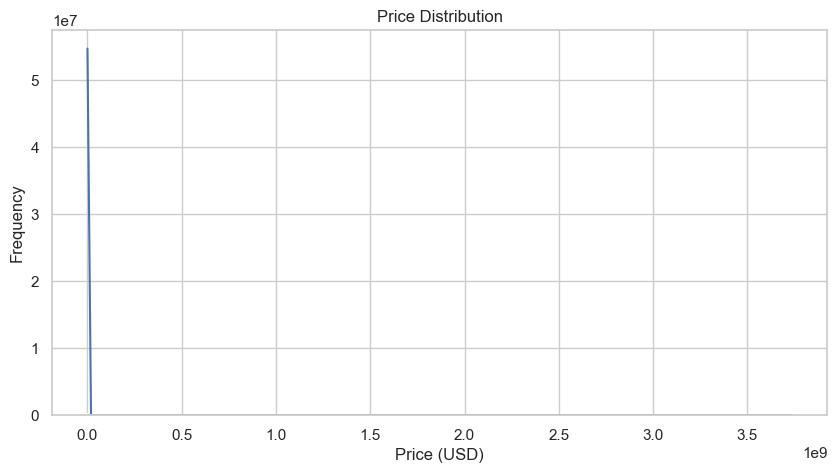

In [245]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=10, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


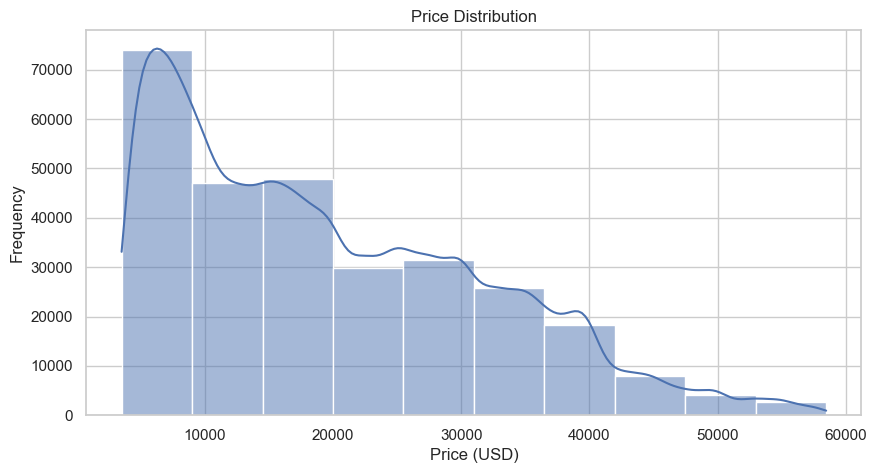

In [246]:
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['price'], bins=10, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [247]:
odo_percentile75 = df_filtered['odometer'].quantile(0.75)
odo_percentile25 = df_filtered['odometer'].quantile(0.25)
odo_iqr = odo_percentile75 - odo_percentile25
odo_upper_limit = odo_percentile75 + 1.5 * odo_iqr
odo_lower_limit = df_filtered['odometer'].quantile(0.05) # Using 5th percentile as lower bound
df_filtered = df_filtered[(df_filtered['odometer'] < odo_upper_limit) & (df_filtered['odometer'] > odo_lower_limit)]

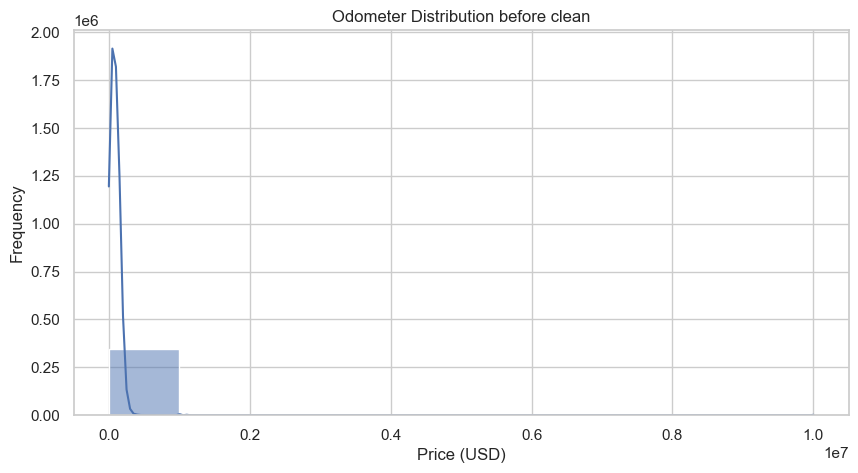

In [281]:
plt.figure(figsize=(10, 5))
sns.histplot(df['odometer'], bins=10, kde=True)
plt.title("Odometer Distribution before clean")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

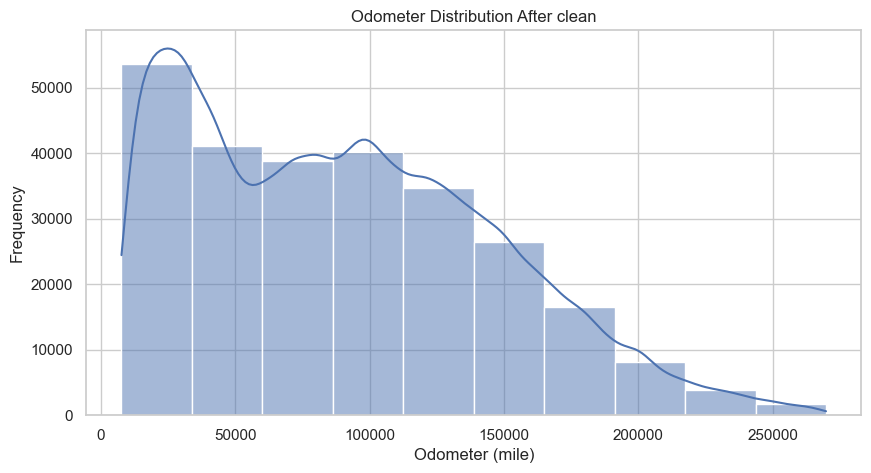

In [282]:
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['odometer'], bins=10, kde=True)
plt.title("Odometer Distribution After clean")
plt.xlabel("Odometer (mile)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [250]:
df_filtered.shape

(272410, 15)

In [251]:
year_sort = df_filtered['year'].value_counts().sort_index().items()
year_sort

In [252]:
for year, count in year_sort:
    print(f"{year}: {count}")


1905: 1
1915: 1
1918: 1
1922: 1
1923: 5
1924: 2
1926: 4
1927: 5
1928: 14
1929: 18
1930: 20
1931: 14
1932: 19
1933: 5
1934: 13
1935: 4
1936: 16
1937: 24
1938: 8
1939: 12
1940: 19
1941: 19
1942: 3
1943: 1
1944: 2
1946: 21
1947: 17
1948: 20
1949: 21
1950: 33
1951: 33
1952: 28
1953: 26
1954: 40
1955: 65
1956: 60
1957: 53
1958: 31
1959: 24
1960: 35
1961: 31
1962: 52
1963: 92
1964: 147
1965: 192
1966: 201
1967: 144
1968: 234
1969: 170
1970: 147
1971: 164
1972: 209
1973: 173
1974: 130
1975: 93
1976: 100
1977: 145
1978: 171
1979: 206
1980: 149
1981: 111
1982: 121
1983: 127
1984: 214
1985: 282
1986: 287
1987: 256
1988: 307
1989: 326
1990: 333
1991: 338
1992: 330
1993: 349
1994: 478
1995: 622
1996: 591
1997: 720
1998: 806
1999: 1341
2000: 1578
2001: 2084
2002: 2715
2003: 3650
2004: 5026
2005: 6032
2006: 7698
2007: 9535
2008: 11526
2009: 8386
2010: 11165
2011: 14659
2012: 16909
2013: 21804
2014: 20958
2015: 21462
2016: 20351
2017: 24944
2018: 26091
2019: 15742
2020: 8346
2021: 119
2022: 3


<Axes: title={'center': 'Number of Cars by Year'}, xlabel='year'>

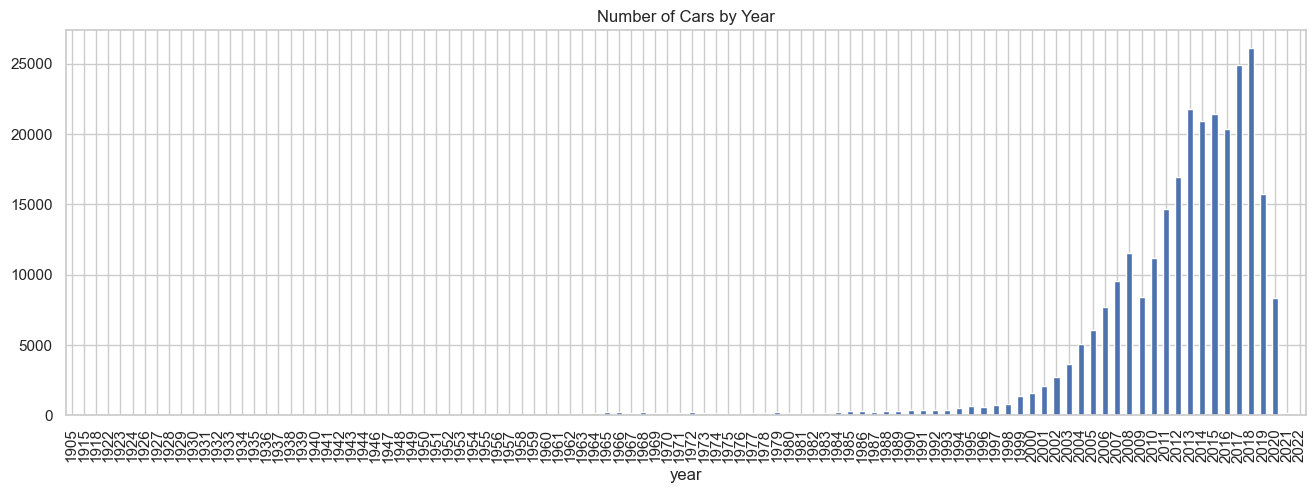

In [253]:
df_filtered['year'].value_counts().sort_index().plot(kind='bar', figsize=(16,5), title="Number of Cars by Year")


In [254]:
# กรองเฉพาะรถที่ผลิตในช่วงที่มีข้อมูลเยอะและสมเหตุสมผล
df_filtered = df_filtered[(df['year'] >= 1995) & (df['year'] <= 2021)]
df_filtered.shape

C:\Users\User\AppData\Local\Temp\ipykernel_4916\3178783294.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(df['year'] >= 1995) & (df['year'] <= 2021)]


(264860, 15)

In [255]:
current_year = pd.Timestamp.now().year
df_filtered['car_age'] = current_year - df_filtered['year']
df_filtered.drop(['year'], axis=1, inplace=True)

In [256]:
car_ages_show = df_filtered['car_age'].value_counts().sort_index().items()

for car, num in car_ages_show:
    print(f"{car} : {num}")

4 : 119
5 : 8346
6 : 15742
7 : 26091
8 : 24944
9 : 20351
10 : 21462
11 : 20958
12 : 21804
13 : 16909
14 : 14659
15 : 11165
16 : 8386
17 : 11526
18 : 9535
19 : 7698
20 : 6032
21 : 5026
22 : 3650
23 : 2715
24 : 2084
25 : 1578
26 : 1341
27 : 806
28 : 720
29 : 591
30 : 622


## train model


In [257]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [297]:
df_final = df_filtered.copy()

In [298]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264860 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        264860 non-null  object
 1   price         264860 non-null  int64 
 2   manufacturer  264860 non-null  object
 3   model         264860 non-null  object
 4   condition     264860 non-null  object
 5   cylinders     264860 non-null  object
 6   fuel          264860 non-null  object
 7   odometer      264860 non-null  int64 
 8   title_status  264860 non-null  object
 9   transmission  264860 non-null  object
 10  drive         264860 non-null  object
 11  type          264860 non-null  object
 12  paint_color   264860 non-null  object
 13  state         264860 non-null  object
 14  car_age       264860 non-null  int64 
dtypes: int64(3), object(12)
memory usage: 32.3+ MB


In [299]:
df_final['price'].describe()

count    264860.000000
mean      19494.881704
std       12033.338818
min        3525.000000
25%        8995.000000
50%       16990.000000
75%       27990.000000
max       58448.000000
Name: price, dtype: float64

In [300]:
X = df_final.drop('price', axis=1)
y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)

# Ordinal column
ordinal_col = ['condition']

numeric_cols = X.select_dtypes(include='number').columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

## Setting preprocess

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# --- Numeric Transformer: Scaling only ---
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# --- Ordinal Transformer: condition column ---
# เผื่อกรณีมี "Unknown" ตอน fillna
condition_order = ['Unknown', 'salvage', 'fair', 'good', 'excellent', 'like new', 'new']
train_conditions = X_train['condition'].unique()
final_condition_order = [c for c in condition_order if c in train_conditions]

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ordinal', OrdinalEncoder(categories=[final_condition_order],
                               handle_unknown='use_encoded_value',
                               unknown_value=-1))
])

# --- Categorical Transformer: Other object columns ---
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# --- Combine into ColumnTransformer ---
transformers_list = []
if numeric_cols:
    transformers_list.append(('num', numeric_transformer, numeric_cols))
if ordinal_col:
    transformers_list.append(('ord', ordinal_transformer, ordinal_col))
if categorical_cols:
    transformers_list.append(('cat', categorical_transformer, categorical_cols))

if not transformers_list:
    raise ValueError("No features selected for preprocessing.")

preprocessor = ColumnTransformer(
    transformers=transformers_list,
    remainder='drop'  # Drop anything not listed above
)



In [ ]:
import time

# เริ่มจับเวลา
start_time = time.time()

# Fit pipeline ด้วย X_train (เรียนรู้ mean/scale/category จาก train เท่านั้น)
preprocessor.fit(X_train, y_train)

# Transform ข้อมูล train/test ด้วย pipeline ที่ fit แล้ว
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# แสดงเวลา preprocessing
preprocess_time = time.time() - start_time
print(f"Preprocessing completed in {preprocess_time:.2f} seconds.")
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

# พยายามดึงชื่อฟีเจอร์ใหม่ที่ถูกสร้างจาก pipeline (เช่น ชื่อหลัง OneHotEncoder)
try:
    feature_names_out = preprocessor.get_feature_names_out()
    print("Feature names extracted from pipeline.")
except Exception as e:
    print(f"Warning: Could not get detailed feature names: {e}")
    num_output_features = X_train_processed.shape[1]
    feature_names_out = [f'feature_{i}' for i in range(num_output_features)]


✅ Preprocessing completed in 1.66 seconds.
X_train_processed shape: (185402, 251)
X_test_processed shape: (79458, 251)
✅ Feature names extracted from pipeline.


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load data
data = np.load('../airflow/data/preprocessed_data.npz', allow_pickle=True)

X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

# (Optional) log-transform ถ้าข้อมูล skew
y_train_log = np.log1p(y_train)

# Train
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train_log)

# Predict บน test set → log back
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


✅ RMSE: 3545.96
✅ R²: 0.91
